In [40]:
# !pip install tqdm

In [41]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv("census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [42]:
print("Size of Dataset1:",data.shape)
highincome_ratio = 1.*data['income'][data['income']=='>50K'].shape[0]/data.shape[0]
print("Individuals with income >50k USD: {}".format(str(100 * highincome_ratio )+"%"))
us_ratio = (1.*data['native-country'][data['native-country']==' United-States'].shape[0])/data.shape[0]
print("Individuals from US: {}".format(str(100 * us_ratio )+"%"))
male_ratio = us_ratio = (1.*data['sex'][data['sex']==' Male'].shape[0])/data.shape[0]
print("Male gender: {}".format(str(100 * male_ratio )+"%"))

data.head()

Size of Dataset1: (45222, 14)
Individuals with income >50k USD: 24.78439697492371%
Individuals from US: 91.30953960461721%
Male gender: 67.50475432311707%


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [43]:
log_features = ['capital-gain','capital-loss']
data[log_features] = data[log_features].apply(lambda x: np.log(x + 1))

In [44]:
from sklearn.preprocessing import MinMaxScaler

num_features  = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[num_features] = MinMaxScaler().fit_transform(data[num_features])

We drop the feature `native-country` here because it was so highly imbalanced that it really couldn't tell us anything.  91% of the respondents were from the US.

In [45]:
labels = data['income'].apply(lambda x: 0 if x=='<=50K' else 1)

cat_features = [x for x in data.columns if x not in num_features and x !='income' and x != 'native-country']
dummy = pd.get_dummies(data[cat_features])

data = data.drop(cat_features + ['income', 'native-country'],axis = 1)

features = pd.concat([data,dummy],axis = 1)

print("Input size",features.shape)
features.head()

Input size (45222, 62)


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [46]:
data.to_csv("census-encoded.csv")

In [47]:
# cat_features
# pd.get_dummies(data['native-country']).shape # we dropped native-country earlier since it was highly imbalanced

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
# This controls the AUC curve by quite a bit.
#sss = StratifiedShuffleSplit(test_size = 0.0001,random_state = 0, n_splits = 1)
#sss = StratifiedShuffleSplit(test_size = 0.001, random_state = 0, n_splits = 1)
sss = StratifiedShuffleSplit(test_size = 0.2, random_state = 0, n_splits = 1)
features
for train_index, test_index in sss.split(features, labels):
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]
    
# Show the results of splitting
print("Training set1 size:", X_train.shape)
print("Testing set1 size:", X_test.shape)

Training set1 size: (36177, 62)
Testing set1 size: (9045, 62)


In [49]:
# Find features with high colinearity with others
corr = np.corrcoef(X_train,rowvar=0)
w, v = np.linalg.eig(np.nan_to_num(corr))
w_array = [(i,np.abs(w[i]),features.columns[i]) for i in  range(len(w)) if np.abs(w[i]) < 0.01]
w_array

[(54, 9.570855203898099e-16, 'relationship_ Wife'),
 (55, 6.219902548030032e-16, 'race_ Amer-Indian-Eskimo'),
 (56, 1.389082759389115e-15, 'race_ Asian-Pac-Islander'),
 (57, 1.389082759389115e-15, 'race_ Black'),
 (58, 1.0594532089947935e-15, 'race_ Other'),
 (59, 2.716161564947462e-17, 'race_ White'),
 (60, 5.520802470145084e-16, 'sex_ Female'),
 (61, 3.9464458737284154e-16, 'sex_ Male')]

In [50]:
# Find features corelated to those features
v_array = np.array([np.abs(v[:,i]) for i,x,name in w_array])
table = v_array > 0.25

total_corr_features = set()

for i in range(len(table)):
    corr_features = [j for j in range(len(table[i])) if table[i][j]== True]
    print('For {}th feature"'.format(w_array[i][0]), w_array[i][2],'", correlated features are:', corr_features)
    total_corr_features = total_corr_features | set(corr_features)

For 54th feature" relationship_ Wife ", correlated features are: [21, 23, 24, 27]
For 55th feature" race_ Amer-Indian-Eskimo ", correlated features are: [6, 7, 8, 9, 10]
For 56th feature" race_ Asian-Pac-Islander ", correlated features are: [30, 32, 57, 59]
For 57th feature" race_ Black ", correlated features are: [30, 32, 57, 59]
For 58th feature" race_ Other ", correlated features are: [1, 57, 59]
For 59th feature" race_ White ", correlated features are: [35, 37, 38, 44, 46, 49, 50]
For 60th feature" sex_ Female ", correlated features are: [30, 32, 49, 50]
For 61th feature" sex_ Male ", correlated features are: [60, 61]


In [51]:
[(i,features.columns[i])  for i in total_corr_features]

[(1, 'education-num'),
 (6, 'workclass_ Local-gov'),
 (7, 'workclass_ Private'),
 (8, 'workclass_ Self-emp-inc'),
 (9, 'workclass_ Self-emp-not-inc'),
 (10, 'workclass_ State-gov'),
 (21, 'education_level_ Bachelors'),
 (23, 'education_level_ HS-grad'),
 (24, 'education_level_ Masters'),
 (27, 'education_level_ Some-college'),
 (30, 'marital-status_ Married-civ-spouse'),
 (32, 'marital-status_ Never-married'),
 (35, 'occupation_ Adm-clerical'),
 (37, 'occupation_ Craft-repair'),
 (38, 'occupation_ Exec-managerial'),
 (44, 'occupation_ Prof-specialty'),
 (46, 'occupation_ Sales'),
 (49, 'relationship_ Husband'),
 (50, 'relationship_ Not-in-family'),
 (57, 'race_ Black'),
 (59, 'race_ White'),
 (60, 'sex_ Female'),
 (61, 'sex_ Male')]

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc,roc_curve

baseline_clf = [MLPClassifier(random_state=5295468), 
                 DecisionTreeClassifier(random_state=5295468), 
                 KNeighborsClassifier(5, n_jobs=-1, algorithm="ball_tree"),
                 SVC(C=1,probability=True,random_state=5295468), 
                 GradientBoostingClassifier(random_state=5295468)]

colors = ['darkorange','red','darkgreen','purple','pink']

In [53]:
import pickle
import os
baseline_rocauc_results = {}
for clf in tqdm(baseline_clf):
    clf_name = clf.__class__.__name__
    baseline_rocauc_results[clf_name] = {'auc':0,'fpr':[],'tpr':[]}
#     if os.path.isfile(clf_name + '_baseline.pkl'):
#         with open(clf_name + '_baseline.pkl', 'rb') as f:
#             clf = pickle.load(f)
#     else:
    clf.fit(X_train,y_train)
    with open(clf_name + '_baseline.pkl', 'wb') as f:
        pickle.dump(clf, f)
    baseline_rocauc_results[clf_name]['fpr'], baseline_rocauc_results[clf_name]['tpr'],_ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    baseline_rocauc_results[clf_name]['auc'] = auc(baseline_rocauc_results[clf_name]['fpr'], baseline_rocauc_results[clf_name]['tpr'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:50<00:00, 82.18s/it]


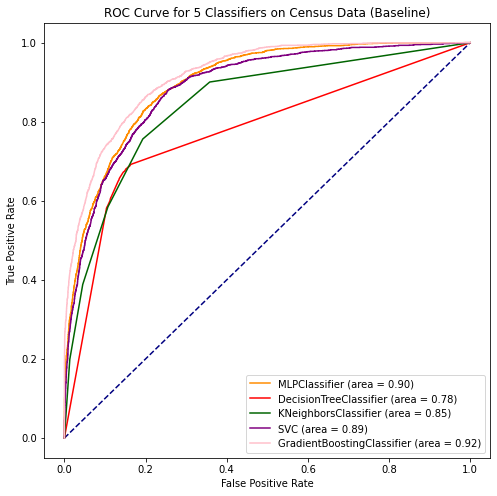

In [54]:

plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')

for i,name in enumerate(rocauc_results.keys()):
    plt.plot(baseline_rocauc_results[name]['fpr'], baseline_rocauc_results[name]['tpr'], color=colors[i],label='{} (area = {:.2f})'.format(name,baseline_rocauc_results[name]['auc']))

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for 5 Classifiers on Census Data (Baseline)');
plt.legend(loc="lower right");  

plt.savefig('ROC Curve for 5 Classifiers on Census (Baseline).png')

In [17]:
from sklearn.metrics import accuracy_score
baseline = [MLPClassifier(random_state=5295468),
            DecisionTreeClassifier(random_state=5295468),
            KNeighborsClassifier(n_neighbors=5, n_jobs=-1, algorithm='ball_tree'),
            SVC(C = 1,random_state=5295468),
            GradientBoostingClassifier(random_state=5295468)]

names = [clf.__class__.__name__ for clf in baseline]

In [18]:
learning_curve_samples = []

for i in [1,2,5]:
    learning_curve_samples.append(int(i * X_train.shape[0] / 100.))
    
for i in range(1,11):
    learning_curve_samples.append(int(i * 10 * X_train.shape[0] / 100.))

In [19]:
learningcurve_results = {}
for clf in tqdm(baseline):
    clf_name = clf.__class__.__name__
    learningcurve_results[clf_name] = {'test':[],'train':[]}

    for i, sample in enumerate(learning_curve_samples):
        clf_name_file = ('census_' + clf_name + '_{}.pkl').format(sample)
        if os.path.isfile(clf_name_file):
            with open(clf_name_file, 'rb') as f:
                clf = pickle.load(f)
        else:
            clf.fit(X_train[:sample],y_train[:sample])
            with open(clf_name_file, 'wb') as f:
                pickle.dump(clf, f)
        
        ytest_pred = clf.predict(X_test)
        ytrain_pred = clf.predict(X_train[:sample])
        
        error_test = 1. - accuracy_score(y_test,ytest_pred)
        error_train = 1. - accuracy_score(y_train[:sample],ytrain_pred)
                
        learningcurve_results[clf_name]['test'].append(error_test)
        learningcurve_results[clf_name]['train'].append(error_train) 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:57<00:00, 95.53s/it]


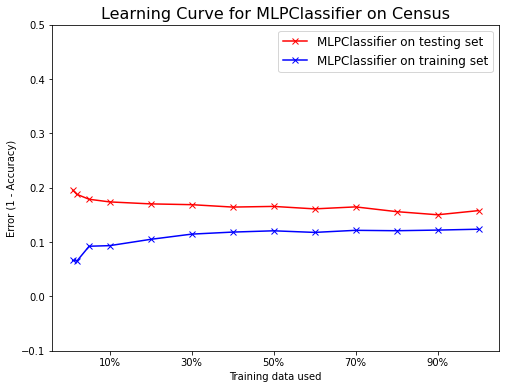

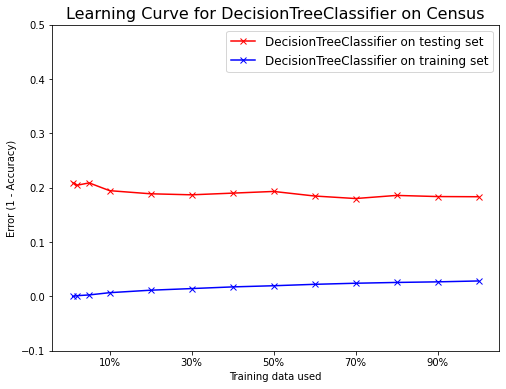

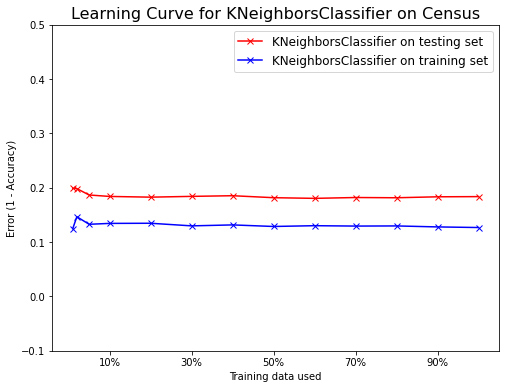

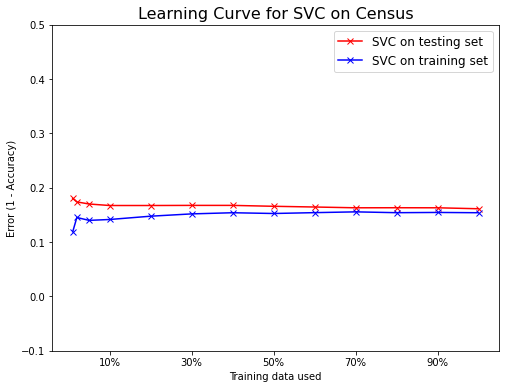

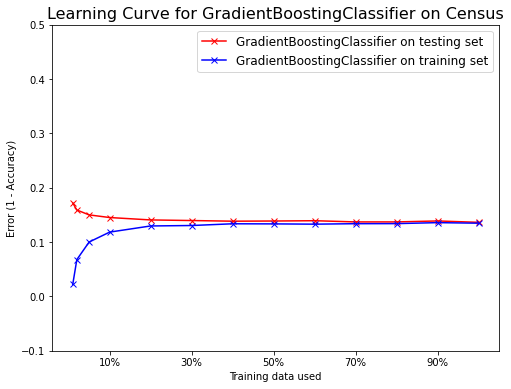

In [20]:
for i in range(len(names)):
    x_data = [1,2,5,10,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (8,6))
    plt.title('Learning Curve for {} on Census'.format(names[i]),fontsize = 16)
    plt.plot(x_data,learningcurve_results[names[i]]['test'],'rx-', label = names[i] + ' on testing set' )
    plt.plot(x_data,learningcurve_results[names[i]]['train'],'bx-',label = names[i] + ' on training set')
    
    ticks = [10,30,50,70,90]
    plt.xticks(ticks,[str(x)+"%" for x in ticks])
    plt.xlabel("Training data used")
    plt.ylabel("Error (1 - Accuracy)")
    plt.legend(loc="best",fontsize = 12);   
    plt.ylim([-0.1, 0.5])
    plt.savefig("Learning Curve for " + names[i] + 'on Census Data.png')

In [21]:
#calculate the depth of the tree at each iteration of the learning curve
for clf in tqdm(baseline):
    clf_name = clf.__class__.__name__
    if(clf_name.find("DecisionTree") == -1):
        continue
    learningcurve_results[clf_name] = {'test':[],'train':[]}

    for i, sample in enumerate(learning_curve_samples):
        clf_name_file = (clf_name + '_{}.pkl').format(sample)
        if os.path.isfile(clf_name_file):
            with open(clf_name_file, 'rb') as f:
                clf = pickle.load(f)
        else:
            raise(clf_name_file)

        print(clf.get_depth())
        print(clf.get_n_leaves())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 99.72it/s]

13
58
28
126
28
289
38
648
40
1271
47
1980
42
2600
45
3297
45
3909
49
4679
46
5308
48
5846
51
6460


In [22]:
dataset_name = 'Census'
random_seed = 5295468

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:09<00:00,  5.14it/s]


Lowest Error Rate at 11 max_depth: 0.14449972360420127


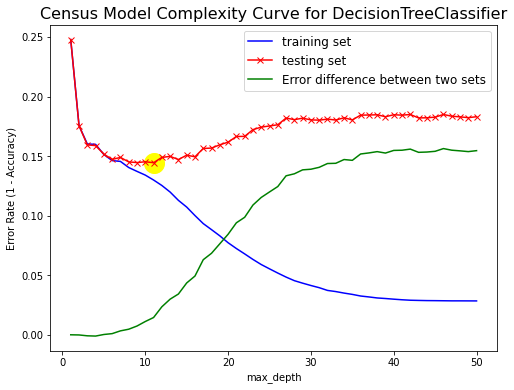

In [23]:
# Decision Tree
hyper_params = range(1, DecisionTreeClassifier(random_state = random_seed).fit(X_train, y_train).tree_.max_depth)
results = {'test':[], 'train':[]}
algorithm_name = 'DecisionTreeClassifier'

param_name = 'max_depth'

for i in tqdm(hyper_params):
    clf = DecisionTreeClassifier(random_state=random_seed, max_depth=i)
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {}'.format(dataset_name, algorithm_name), fontsize = 16)

error_diff = pd.Series(np.array(results['test']) - np.array(results['train']))
plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()
plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:40<00:00, 14.33s/it]


Lowest Error Rate at 50 max iterations: 0.14914317302377


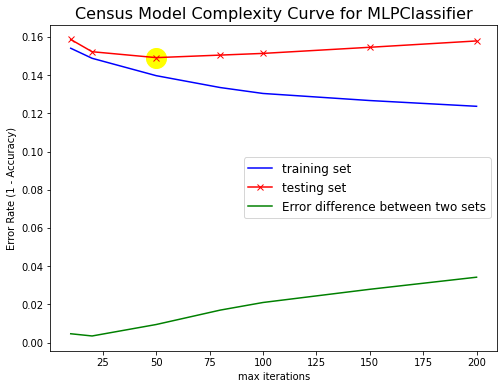

In [24]:
# Neural Network
hyper_params = [10,20,50,80,100,150,200]
results = {'test':[], 'train':[]}
algorithm_name = 'MLPClassifier'

param_name = 'max iterations'

for i in tqdm(hyper_params):
    clf = MLPClassifier(random_state=random_seed, solver='adam', max_iter=i)
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {}'.format(dataset_name, algorithm_name), fontsize = 16)

error_diff = pd.Series(np.array(results['test']) - np.array(results['train']))
plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()
plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [10:55<00:00, 81.95s/it]


Lowest Error Rate at 20 nearest neighbors: 0.16373687119955782


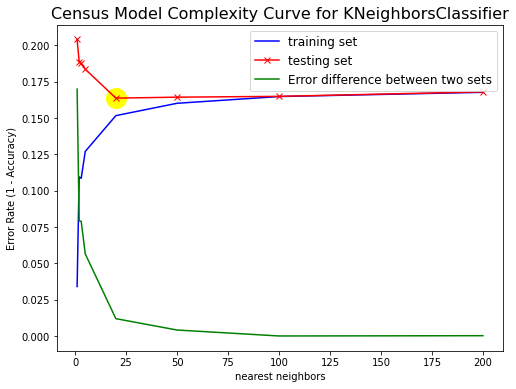

In [25]:
# kNN
hyper_params = [1, 2, 3, 5, 20, 50, 100, 200]
results = {'test':[], 'train':[]}
algorithm_name = 'KNeighborsClassifier'

param_name = 'nearest neighbors'

for i in tqdm(hyper_params):
    np.random.seed(random_seed)
    clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, algorithm="ball_tree")
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {}'.format(dataset_name, algorithm_name), fontsize = 16)

error_diff = pd.Series(np.array(results['test']) - np.array(results['train']))
plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()

plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:55<00:00, 73.80s/it]


Lowest Error Rate at linear kernels: 0.15975677169707025


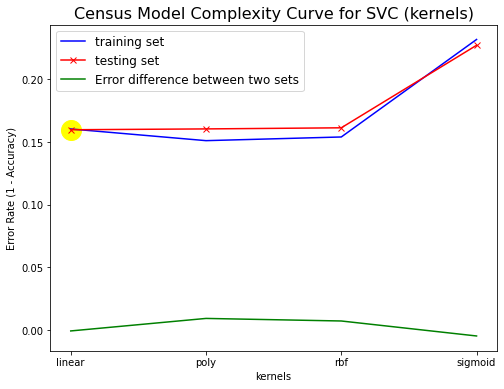

In [28]:
# SVM for kernel
hyper_params = ['linear', 'poly', 'rbf', 'sigmoid']
results = {'test':[], 'train':[]}
algorithm_name = 'SVC'

param_name = 'kernels'

for i in tqdm(hyper_params):
    np.random.seed(random_seed)
    clf = SVC(kernel=i)
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {} ({})'.format(dataset_name, algorithm_name, param_name), fontsize = 16)

error_diff = pd.Series(np.array(results['test']) - np.array(results['train']))
plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()
plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [26:41<00:00, 177.94s/it]


Lowest Error Rate at 5.0 C: 0.1584300718629077


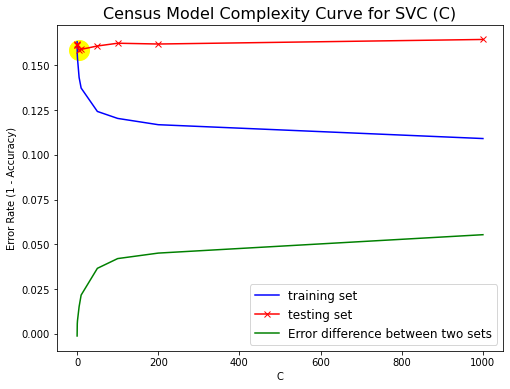

In [29]:
# SVM for C
hyper_params = [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 200.0, 1000.0] # , 10000.0]
results = {'test':[], 'train':[]}
algorithm_name = 'SVC'

param_name = 'C'

for i in tqdm(hyper_params):
    np.random.seed(random_seed)
    clf = SVC(C=i, probability=True, random_state=random_seed)
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {} ({})'.format(dataset_name, algorithm_name, param_name), fontsize = 16)

error_diff = pd.Series(np.array(results['test']) - np.array(results['train']))
plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()
plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:17<00:00,  9.63s/it]


Lowest Error Rate at 6 max_depth: 0.1282476506357103


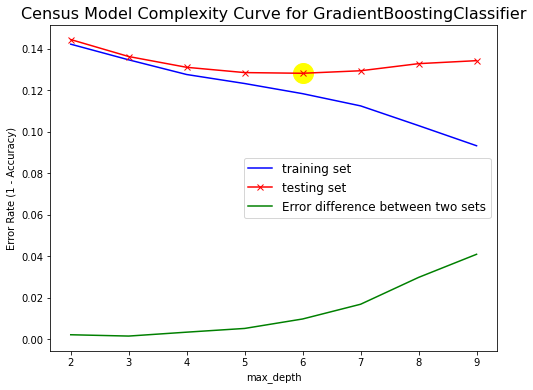

In [32]:
# Gradient Boosted Machines
hyper_params = range(2, 10)
results = {'test':[], 'train':[]}
algorithm_name = 'GradientBoostingClassifier'

param_name = 'max_depth'

for i in tqdm(hyper_params):
    clf = GradientBoostingClassifier(random_state=random_seed, max_depth=i)
    clf.fit(X_train, y_train)

    train_error = 1. - accuracy_score(clf.predict(X_train), y_train)
    test_error = 1. - accuracy_score(clf.predict(X_test), y_test)

    results['train'].append(train_error)
    results['test'].append(test_error)
    
opt = pd.Series(results['test']).idxmin() 
print("Lowest Error Rate at {} {}: {}".format( hyper_params[opt], param_name, results['test'][opt]))

plt.figure(figsize = (8,6))
plt.title('{} Model Complexity Curve for {}'.format(dataset_name, algorithm_name), fontsize = 16)

plt.plot(hyper_params, results['train'],'b-',label = 'training set')
plt.plot(hyper_params, results['test'],'rx-',label = 'testing set')
plt.plot(hyper_params, np.array(results['test']) - np.array(results['train']),'g-', label = 'Error difference between two sets')

opt = pd.Series(results['test']).idxmin()
plt.scatter(hyper_params[opt], results['test'][opt], s = 400, c = 'yellow')

plt.xlabel(param_name)
plt.ylabel("Error Rate (1 - Accuracy)")
plt.legend(loc="best", fontsize = 12)

png_name = '{} Model Complexity Curve for {} ({}) .png'.format(dataset_name, algorithm_name, param_name)
plt.savefig(png_name)


In [61]:
improved_clf = [MLPClassifier(random_state=random_seed, max_iter=50), 
                 DecisionTreeClassifier(random_state=random_seed, max_depth=12), 
                 KNeighborsClassifier(n_neighbors=55, n_jobs=-1, algorithm="ball_tree"),
                 SVC(C=5,probability=True,random_state=random_seed), 
                 GradientBoostingClassifier(random_state=random_seed, max_depth=6)]

colors = ['darkorange','red','darkgreen','purple','pink']

In [62]:
improved_rocauc_results = {}

for clf in tqdm(improved_clf):
    np.random.seed(random_seed)
    clf_name = clf.__class__.__name__
    improved_rocauc_results[clf_name] = {'auc':0,'fpr':[],'tpr':[]}
    
    if os.path.isfile(clf_name + '_improved.pkl'):
        with open(clf_name + '_improved.pkl', 'rb') as f:
            clf = pickle.load(f)
    else:
        clf.fit(X_train,y_train)
        with open(clf_name + '_improved.pkl', 'wb') as f:
            pickle.dump(clf, f)
    improved_rocauc_results[clf_name]['fpr'] ,improved_rocauc_results[clf_name]['tpr'],_ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    improved_rocauc_results[clf_name]['auc'] = auc(improved_rocauc_results[clf_name]['fpr'], improved_rocauc_results[clf_name]['tpr'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:29<00:00,  5.83s/it]


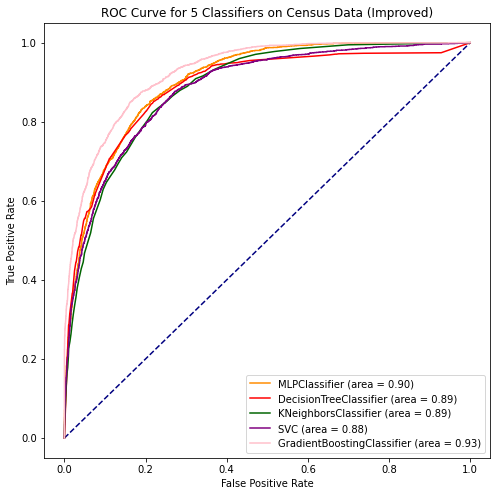

In [60]:
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')

for i,name in enumerate(improved_rocauc_results.keys()):
    plt.plot(improved_rocauc_results[name]['fpr'], improved_rocauc_results[name]['tpr'], color=colors[i],label='{} (area = {:.2f})'.format(name, improved_rocauc_results[name]['auc']))

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for 5 Classifiers on Census Data (Improved)');
plt.legend(loc="lower right");  

plt.savefig('ROC Curve for 5 Classifiers on Census (Improved).png')

In [59]:
print(baseline_rocauc_results)
print(improved_rocauc_results)

{'MLPClassifier': {'auc': 0.8989596734294821, 'fpr': array([0.        , 0.        , 0.        , ..., 0.99955902, 0.99985301,
       1.        ]), 'tpr': array([0.00000000e+00, 4.46030330e-04, 2.31935772e-02, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])}, 'DecisionTreeClassifier': {'auc': 0.7764329847132825, 'fpr': array([0.        , 0.10348376, 0.10348376, 0.10465971, 0.10612965,
       0.11142143, 0.11186241, 0.11333235, 0.11347935, 0.11436131,
       0.11450831, 0.11480229, 0.13302955, 0.1340585 , 0.13479347,
       0.13538145, 0.13567544, 0.13626341, 0.13641041, 0.14405409,
       0.14493606, 0.14537704, 0.14567103, 0.14758195, 0.14831692,
       0.15184477, 0.15243275, 0.15331471, 0.15404968, 0.15419668,
       0.15463766, 0.15698956, 0.15728355, 0.15743055, 0.15948846,
       0.16037042, 0.16139938, 0.16242834, 0.16272233, 0.16316331,
       0.16389828, 1.        ]), 'tpr': array([0.        , 0.5793934 , 0.58028546, 0.5838537 , 0.58608385,
       0.59812667, 0.5985